### Imports

In [33]:
from bs4 import BeautifulSoup
import requests
import pandas as pd 
import matplotlib.pyplot as plt

### Webpage Request

#### storing webpage in variable

In [22]:
website = 'https://www.cars.com/shopping/results/?dealer_id=&keyword=&list_price_max=&list_price_min=&makes[]=bmw&maximum_distance=all&mileage_max=&monthly_payment=&page_size=20&sort=best_match_desc&stock_type=used&year_max=&year_min=&zip='

#### Requesting webpage

In [23]:
response = requests.get(website)

#### Checking status

In [24]:
response.status_code

200

In [25]:
soup = BeautifulSoup(response.content, 'html.parser')

### Results

In [26]:
results = soup.find_all('div', {'class' : 'vehicle-card'})

In [27]:
len(results)

20

### Targeted data

In [ ]:
#name
#mileage
#dealer_name
#price

#### Name

In [29]:
results[0].find('h2').get_text()

'2021 BMW X5 xDrive40i'

#### Mileage

In [30]:
results[0].find('div', {'class':'mileage'}) get.text()



SyntaxError: invalid syntax (2068315140.py, line 1)

#### Dealer Name

In [ ]:
results[0].find('div', {'class':'dealer-name'}).get_text().strip()

'Pacific BMW'

#### Price

In [ ]:
results[0].find('span', {'class':'primary-price'}).get_text()

'$34,999'

### Put everything together inside a For-Loop

In [ ]:
name = []
mileage = []
dealer_name = []
price = []

for result in results:
    
    # name
    try:
        name.append(result.find('h2').get_text()) 
    except:
        name.append('n/a')
    
    # mileage
    try:
        mileage.append(result.find('div', {'class':'mileage'}).get_text())
    except:
        mileage.append('n/a')
    
    # dealer_name
    try:
        dealer_name.append(result.find('div', {'class':'dealer-name'}).get_text().strip())
    except:
        dealer_name.append('n/a')
        
       
    #price 
    try:
        price.append(result.find('span', {'class':'primary-price'}).get_text())
    except:
        price.append('n/a')

### Create Pandas Dataframe

In [ ]:
# dictionary
car_dealer = pd.DataFrame({'Name': name, 'Mileage':mileage, 'Dealer Name':dealer_name,
                                 'Price': price})

In [ ]:
car_dealer

,Name,Mileage,Dealer Name,Price
0,2021 BMW 330e xDrive,"30,852 mi.",BMW of North Haven,"$37,499"
1,2022 BMW X3 xDrive30i,"17,697 mi.",Tulley Automotive Group,"$42,997"
2,2019 BMW 330 i xDrive,"26,048 mi.",Rairdon's Auto Outlet,"$28,995"
3,2013 BMW 335 i,"36,178 mi.",GETTEL GENESIS OF SARASOTA,"$18,491"
4,2020 BMW M550 i xDrive,"39,693 mi.",BMW of Bridgeport,"$53,970"
5,2021 BMW M340 i xDrive,"14,167 mi.",Jeff Wyler Superior Kia,"$47,799"
6,2021 BMW X1 xDrive28i,"18,148 mi.",Perillo BMW,"$33,999"
7,2020 BMW X6 xDrive40i,"60,760 mi.",Huntley Ford,"$49,949"
8,2020 BMW M4 Base,"31,074 mi.",BMW of Alexandria,"$59,998"
9,2021 BMW X5 xDrive40i,"28,542 mi.",Perillo BMW,"$52,888"


In [ ]:
#idea for visualizaztion of data
#find relationship between mileage and price for the same BMW model and possibly develop a
#predicting function for price based on mileage for specific models eg BMW530i
#pagenation exercise not completed so not enough data points for using a specic BMW model

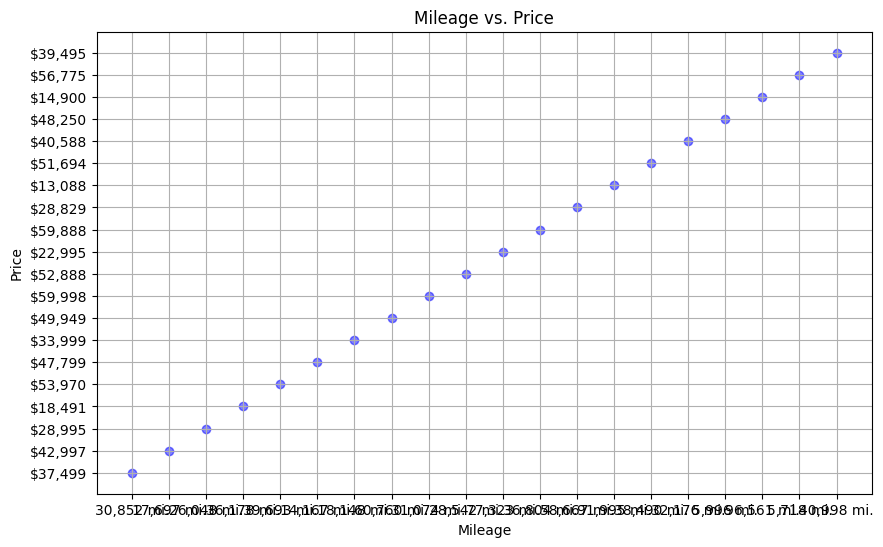

In [39]:
mileagep = car_dealer['Mileage']
pricep = car_dealer['Price']

plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.scatter(mileagep, pricep, marker='o', color='blue', alpha=0.5)
plt.title('Mileage vs. Price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.grid(True)
plt.show()
